<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_eight_(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [15]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Question 2

In [ ]:
!unzip archive.zip

# Question 3

In [3]:
class_names = sorted(os.listdir("dataset"))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

In [4]:
image_size = (64, 64)

inputs = []
targets = []

for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'

        img = Image.open(filepath).convert('RGB').resize(image_size)  # convert to rgb and 64x64 size
        img = np.array(img)                # Convert to numpy arrays

        inputs.append(img)
        targets.append(class_ids[label])

inputs = np.array(inputs, dtype="float32") / 255.0  # Normalize inputs
targets = np.array(targets, dtype="int32")

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

In [5]:
# One-Hot encoding targets
num_classes = len(class_names)
targets = to_categorical(targets, num_classes)

print(targets.shape)


(967, 10)


# Question 4

In [6]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=0
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676, 10), (291, 64, 64, 3), (291, 10))

In [7]:
input_size = x_train.shape[1:]
output_size = len(class_names)

# print(input_size)

mlp = Sequential([
    Input(shape=input_size),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=output_size, activation='softmax')
], name="MLP")

mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,425,866 (24.51 MB)

 Trainable params: 6,425,866 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

Ακολουθεί ανάλυση των αποτελεσμάτων και του μοντέλου με bullets:

*   Το μοντέλο είναι ένα Πολυεπίπεδο Νευρωνικό Δίκτυο (MLP) το οποίο δέχεται ως είσοδο εικόνες rgb διαστάσεων 64χ64χ3.
*   Γίνεται χρήση επιπέδου Flatten. Μετατρέπεται η εικόνα σε μονοδιάστατο διάνυσμα 12.288 χαρακτηριστικών, χωρίς να εισάγονται επιπλέον παράμετροι.
*   Ακολουθούν δύο πλήρως συνδεδεμένα επίπεδα (Dense) με 512 και 256 νευρώνες αντίστοιχα. Αυτά χρησιμοποιούν τη συνάρτηση ενεργοποίησης Relu  για την εισαγωγή μη γραμμικότητας και την αποτελεσματικότερη μάθηση χαρακτηριστικών.
*   Το επίπεδο εξόδου αποτελείται από 10 νευρώνες, όσοι και οι στόχοι (targets) ταξινόμηση δηλαδή. Γίνεται χρήση της συνάρτησης Softmax ώστε να επιτευχθεί η παραγγωγή κατανομής πιθανοτήτων πάνω στις κατηγορίες.
*   Το μοντέλο περιλαμβάνει συνολικά 6.425.866 παραμέτρους, κάτι το οποίο το καθιστά υπολογιστικά απαιτητικό και κάτι το οποίο δημιουργεί κίνδυνο υπερπροσαρμγής.









# Question 5

*   Optimizer: Adam
*   Learning Rate: 0.001
*   Loss Function: Categorical Cross-Entropy
*   Metrics: Accuracy
*   Batch Size: 32
*   Epochs: 50

In [8]:
mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = mlp.fit(
    inputs,
    targets,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test)
)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1000 - loss: 8.8792 - val_accuracy: 0.1649 - val_loss: 2.9369
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.2162 - loss: 2.6391 - val_accuracy: 0.4433 - val_loss: 1.6838
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3644 - loss: 1.8869 - val_accuracy: 0.5704 - val_loss: 1.4407
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4921 - loss: 1.4937 - val_accuracy: 0.6564 - val_loss: 1.1643
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6057 - loss: 1.1905 - val_accuracy: 0.7251 - val_loss: 0.9726
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7315 - loss: 0.9131 - val_accuracy: 0.7663 - val_loss: 0.7604
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7337 - loss: 0.8556 - val_accuracy: 0.7938 - val_loss: 0.6623
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8588 - loss: 0.5804 - val_accuracy: 0.8557

# Question 6

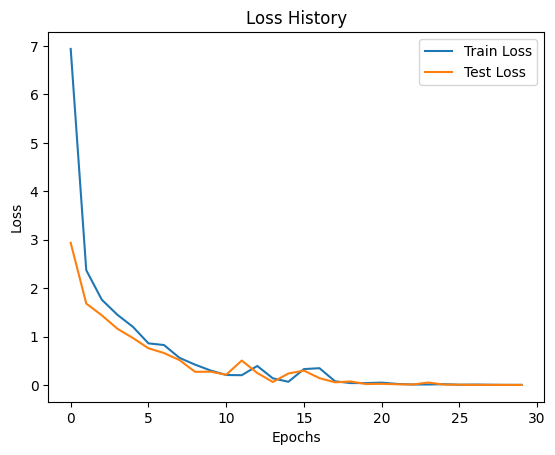

In [10]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')
plt.show()

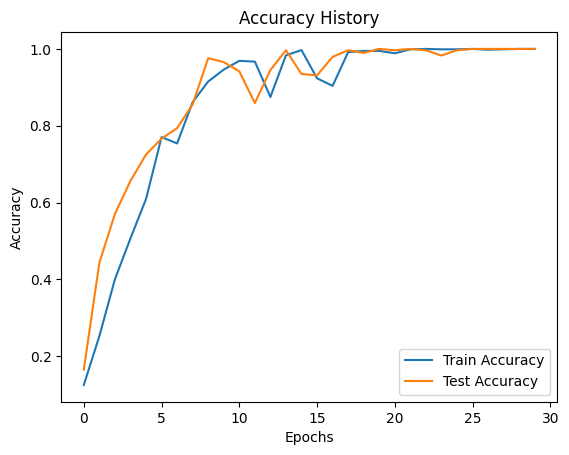

In [11]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy History')
plt.show()

# Question 7

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)




Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.1409 - loss: 2.5287 - val_accuracy: 0.3093 - val_loss: 2.0329
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.3776 - loss: 1.8268 - val_accuracy: 0.8557 - val_loss: 0.8164
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.8260 - loss: 0.7255 - val_accuracy: 0.9656 - val_loss: 0.1895
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9650 - loss: 0.1684 - val_accuracy: 0.9966 - val_loss: 0.0256
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9997 - loss: 0.0247 - val_accuracy: 0.9966 - val_loss: 0.0120
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy:

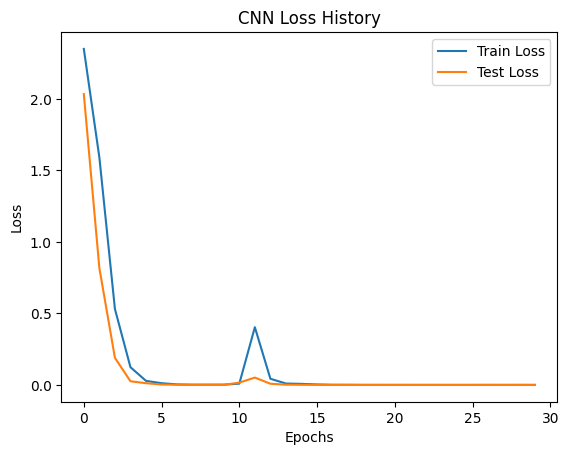

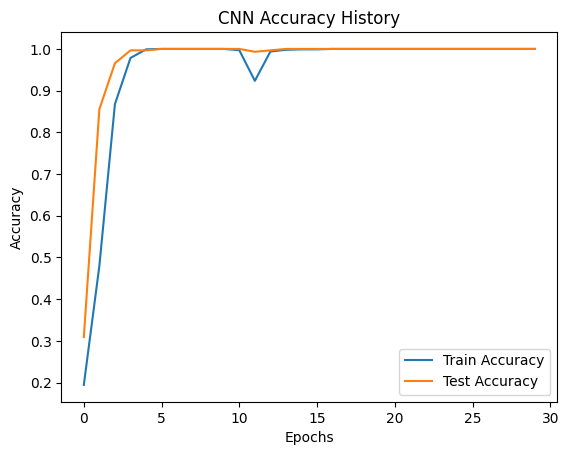

In [12]:

# Create cnn model
cnn = tf.keras.Sequential([
    Input(shape=input_size),
    Conv2D(filters=32, kernel_size=3, strides=2, activation='relu'),
    Dropout(rate=0.2),
    Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=output_size, activation='softmax')
], name='CNN')
cnn.summary()
print("\n\n")

# Train cnn model
cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn.fit(
    inputs,
    targets,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test)
)

# Create graphs

# Loss Graph
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss History')
plt.show()
print("\n\n")

# Accuracy Graph
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy History')
plt.show()
print("\n\n")

Το CNN εμφανίζει συνολικά λιγότερες παραμέτρους σε σύγκριση με το MLP, ωστόσο παρουσιάζει μεγαλύτερη αποδοτικότητα κατά τη διαδικασία μάθησης, επιτυγχάνοντας υψηλότερη ακρίβεια με μικρότερη πολυπλοκότητα. Αντίθετα, το MLP παρουσιάζει σημαντική διαφορά μεταξύ της εκπαίδευσης και της επικύρωσης, γεγονός που υποδηλώνει υπερπροσαρμογή, ενώ το CNN διατηρεί πιο σταθερές καμπύλες, δείχνοντας βελτιωμένη γενίκευση.


Επιπλέον, το CNN αξιοποιεί τα εισερχόμενα χαρακτηριστικά με πιο στοχευμένο τρόπο, περιορίζοντας τους περιττούς υπολογισμούς, σε αντίθεση με το MLP, το οποίο περιλαμβάνει πολύ μεγαλύτερο πλήθος παραμέτρων και συνδέσεων που δεν προσφέρουν ουσιαστική πληροφορία. Συνολικά, το CNN παρουσιάζει καλύτερη ισορροπία bias–variance, επιτυγχάνοντας υψηλότερη απόδοση με μικρότερη υπολογιστική επιβάρυνση.


Με βάση την παρατηρούμενη απόδοση, τον αριθμό των παραμέτρων και τη σταθερότητα των καμπυλών μάθησης, καταλήγουμε ότι το CNN υπερέχει του MLP, καθώς προσφέρει καλύτερη γενίκευση και αποδοτικότερη εκπαίδευση χωρίς να αυξάνει υπερβολικά την πολυπλοκότητα του μοντέλου.

# Question 8

Model: "Improved CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,576,138 (128.08 MB)

 Trainable params: 33,575,690 (128.08 MB)

 Non-trainable params: 448 (1.75 KB)




Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9988 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9993 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9989 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 1.0000 - loss: 8.1654e-04 - val_accuracy: 1.0000 - val_loss: 2.1781e-05
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 1.0000 - loss: 4.5636e-05 - val_accuracy: 1.0000 - val_loss: 1.6979e-05
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 1.0000 - loss: 2.7158e-05 - val_accuracy: 1.0000 - val_loss: 1.5891e-05
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 1.0000 - loss: 1.5696e-05 - val_accuracy: 1.0000 - val_loss: 1.1467e-05
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 1.000

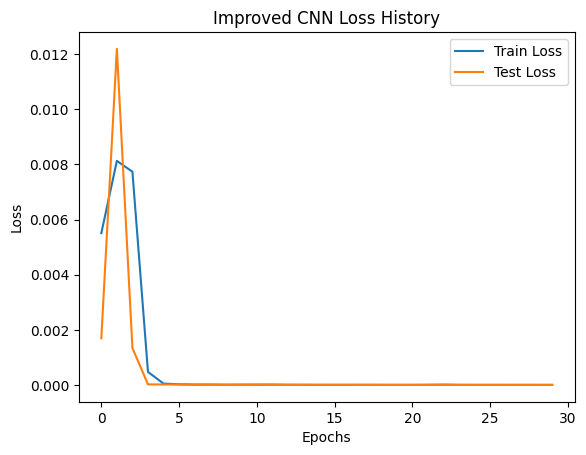

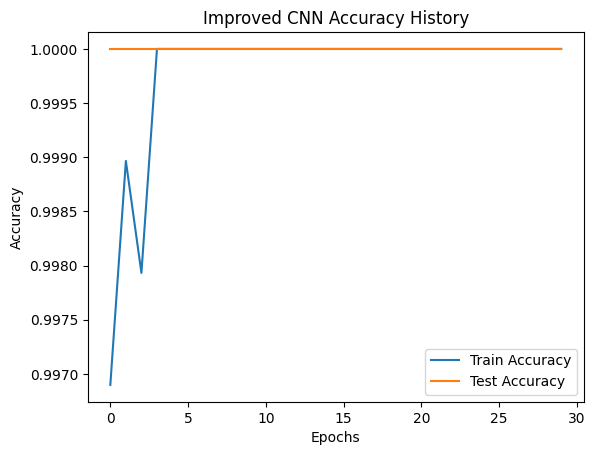

In [14]:
cnn_improved = Sequential([
    Input(shape=input_size),
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=num_classes, activation='softmax')
], name="Improved CNN")

cnn_improved.summary()

print("\n\n")

# Train improved cnn model
cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn.fit(
    inputs,
    targets,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test)
)

# Create graphs

# Loss Graph
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Improved CNN Loss History')
plt.show()
print("\n\n")

# Accuracy Graph
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Improved CNN Accuracy History')
plt.show()
print("\n\n")